# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import vaep
import vaep.databases.diseases

logger = vaep.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
vaep.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "CF"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = vaep.nb.get_params(args, globals=globals())
args = vaep.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = vaep.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'CF',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_CF'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_CF/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.145  1  0.218 0.641 0.001   
                             age        0.078  1  0.118 0.732 0.001   
                             Kiel       2.240  1  3.378 0.068 0.017   
                             Magdeburg  6.200  1  9.347 0.003 0.047   
                             Sweden     9.734  1 14.676 0.000 0.071   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.457  1  0.497 0.482 0.003   
                             age        2.349  1  2.556 0.112 0.013   
                             Kiel       0.015  1  0.016 0.900 0.000   
                             Magdeburg  2.966  1  3.228 0.074 0.017   
                             Sweden    10.286  1 11.195 0.001 0.055   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.193  0.766    False  
                             age               0.136  0.831    False  
                             Kiel              1.170  0.154    False  
                             Magdeburg         2.593  0.011     True  
                             Sweden            3.762  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.317  0.634    False  
                             age               0.953  0.227    False  
                             Kiel              0.046  0.944    False  
                             Magdeburg         1.131  0.165    False  
                             Sweden            3.005  0.005     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                     CF                       \
var                                       SS DF     F p-unc   np2   
protein groups               Source                                 
A0A024QZX5;A0A087X1N8;P35237 AD        0.951  1 7.325 0.007 0.037   
                             age       0.004  1 0.029 0.865 0.000   
                             Kiel      0.167  1 1.282 0.259 0.007   
                             Magdeburg 0.285  1 2.197 0.140 0.011   
                             Sweden    1.272  1 9.791 0.002 0.049   
...                                      ... ..   ...   ...   ...   
S4R3U6                       AD        0.338  1 0.755 0.386 0.004   
                             age       1.377  1 3.077 0.081 0.016   
                             Kiel      0.916  1 2.048 0.154 0.011   
                             Magdeburg 0.144  1 0.321 0.571 0.002   
                             Sweden    3.259  1 7.286 0.008 0.037   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                2.130  0.025     True  
                             age               0.063  0.921    False  
                             Kiel              0.587  0.408    False  
                             Magdeburg         0.854  0.259    False  
                             Sweden            2.693  0.008     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.413  0.539    False  
                             age               1.092  0.169    False  
                             Kiel              0.812  0.278    False  
                             Magdeburg         0.243  0.703    False  
                             Sweden            2.121  0.025     True  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                     CF                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.007         2.130  0.025     True   
                             age       0.865         0.063  0.921    False   
                             Kiel      0.259         0.587  0.408    False   
                             Magdeburg 0.140         0.854  0.259    False   
                             Sweden    0.002         2.693  0.008     True   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.386         0.413  0.539    False   
                             age       0.081         1.092  0.169    False   
                             Kiel      0.154         0.812  0.278    False   
                             Magdeburg 0.571         0.243  0.703    False   
                             Sweden    0.008         2.121  0.025     True   

model                                     PI                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.641         0.193  0.766    False  
                             age       0.732         0.136  0.831    False  
                             Kiel      0.068         1.170  0.154    False  
                             Magdeburg 0.003         2.593  0.011     True  
                             Sweden    0.000         3.762  0.001     True  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.482         0.317  0.634    False  
                             age       0.112         0.953  0.227    False  
                             Kiel      0.900         0.046  0.944    False  
                             Magdeburg 0.074         1.131  0.165    False  
                             Sweden    0.001         3.005  0.005     True  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = vaep.nb.Config.from_dict(
    vaep.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'CF': 'CF', 'PI': 'PI'}

## Describe scores

In [10]:
scores.describe()

model        CF                                PI                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.251         2.543     0.321     0.261         2.480     0.337
std       0.302         4.612     0.330     0.303         5.314     0.331
min       0.000         0.000     0.000     0.000         0.001     0.000
25%       0.002         0.350     0.009     0.004         0.338     0.015
50%       0.100         1.001     0.200     0.120         0.920     0.240
75%       0.447         2.647     0.596     0.459         2.433     0.613
max       0.999        69.198     0.999     0.999       144.193     0.999

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

model                                                        CF                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.007         2.130   
A0A024R0T9;K7ER74;P02655                           AD     0.033         1.481   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.933         0.030   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.257         0.591   
A0A075B6H7                                         AD     0.063         1.204   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.186         0.731   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.298         0.526   
S4R3U6                                             AD     0.386         0.413   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.025     True   
A0A024R0T9;K7ER74;P02655                           AD      0.084    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.963    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.406    False   
A0A075B6H7                                         AD      0.138    False   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.308    False   
Q9Y6X5                                             AD      0.321    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.174    False   
Q9Y6Y9                                             AD      0.451    False   
S4R3U6                                             AD      0.539    False   

model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.641         0.193   
A0A024R0T9;K7ER74;P02655                           AD     0.038         1.421   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.092         1.037   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.427         0.370   
A0A075B6H7                                         AD     0.112         0.950   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.075         1.126   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.289         0.539   
S4R3U6                                             AD     0.482         0.317   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.766    False  
A0A024R0T9;K7ER74;P02655                           AD      0.098    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.196    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.585    False  
A0A075B6H7                                         AD      0.228    False  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model        CF                                PI                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.263         1.405     0.340     0.253         1.408     0.334
std       0.299         1.643     0.322     0.294         1.634     0.318
min       0.000         0.002     0.000     0.000         0.003     0.000
25%       0.012         0.339     0.036     0.011         0.365     0.037
50%       0.124         0.908     0.235     0.113         0.946     0.230
75%       0.458         1.925     0.607     0.431         1.951     0.589
max       0.996        14.393     0.997     0.994        23.684     0.995

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,CF,PI
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,1028,1027


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

CF                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.007         2.130  0.025   
A0A024R0T9;K7ER74;P02655                           0.033         1.481  0.084   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.933         0.030  0.963   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.257         0.591  0.406   
A0A075B6H7                                         0.063         1.204  0.138   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.308   
Q9Y6X5                                             0.186         0.731  0.321   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.174   
Q9Y6Y9                                             0.298         0.526  0.451   
S4R3U6                                             0.386         0.413  0.539   

                                                               PI  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                           True 0.641   
A0A024R0T9;K7ER74;P02655                              False 0.038   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.092   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.427   
A0A075B6H7                                            False 0.112   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                False 0.075   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.289   
S4R3U6                                                False 0.482   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               0.193  0.766   
A0A024R0T9;K7ER74;P02655                                   1.421  0.098   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         1.037  0.196   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.370  0.585   
A0A075B6H7                                                 0.950  0.228   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.315   
Q9Y6X5                                                     1.126  0.167   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.182   
Q9Y6Y9                                                     0.539  0.449   
S4R3U6                                                     0.317  0.634   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                          False       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                            False        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                               

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
CF (no)  - PI (no)    945
CF (yes) - PI (yes)   311
CF (no)  - PI (yes)    83
CF (yes) - PI (no)     82
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

root - INFO     Writen to Excel file under sheet 'differences'.


CF                                \
                                      p-unc -Log10 pvalue qvalue rejected   
protein groups                                                              
A0A024QZX5;A0A087X1N8;P35237          0.007         2.130  0.025     True   
A0A075B6I0                            0.001         3.028  0.004     True   
A0A075B6R2                            0.006         2.223  0.021     True   
A0A075B7B8                            0.007         2.130  0.025     True   
A0A087WTT8;A0A0A0MQX5;O94779;O94779-2 0.005         2.334  0.017     True   
...                                     ...           ...    ...      ...   
Q9ULZ9                                0.510         0.293  0.654    False   
Q9UP79                                0.000         3.427  0.002     True   
Q9UPU3                                0.103         0.989  0.204    False   
Q9UQ52                                0.001         2.979  0.005     True   
Q9Y281;Q9Y281-3                       0.001         3.119  0.004     True   

                                         PI                                \
                                      p-unc -Log10 pvalue qvalue rejected   
protein groups                                                              
A0A024QZX5;A0A087X1N8;P35237          0.641         0.193  0.766    False   
A0A075B6I0                            0.022         1.648  0.065    False   
A0A075B6R2                            0.386         0.413  0.548    False   
A0A075B7B8                            0.035         1.452  0.093    False   
A0A087WTT8;A0A0A0MQX5;O94779;O94779-2 0.048         1.315  0.119    False   
...                                     ...           ...    ...      ...   
Q9ULZ9                                0.000         3.755  0.001     True   
Q9UP79                                0.248         0.606  0.405    False   
Q9UPU3                                0.002         2.735  0.008     True   
Q9UQ52                                0.050         1.299  0.122    False   
Q9Y281;Q9Y281-3                       0.858         0.067  0.920    False   

                                           data  
                                      frequency  
protein groups                                   
A0A024QZX5;A0A087X1N8;P35237                186  
A0A075B6I0                                  194  
A0A075B6R2                                  164  
A0A075B7B8                                   57  
A0A087WTT8;A0A0A0MQX5;O94779;O94779-2       114  
...                                         ...  
Q9ULZ9                                      171  
Q9UP79                                      135  
Q9UPU3                                      163  
Q9UQ52                                      188  
Q9Y281;Q9Y281-3                              51  

[165 rows x 9 columns]

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,CF,PI,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.025,0.766,186,CF (yes) - PI (no)
A0A024R0T9;K7ER74;P02655,0.084,0.098,195,CF (no) - PI (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.963,0.196,174,CF (no) - PI (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.406,0.585,196,CF (no) - PI (no)
A0A075B6H7,0.138,0.228,91,CF (no) - PI (no)
...,...,...,...,...
Q9Y6R7,0.308,0.315,197,CF (no) - PI (no)
Q9Y6X5,0.321,0.167,173,CF (no) - PI (no)
Q9Y6Y8;Q9Y6Y8-2,0.174,0.182,197,CF (no) - PI (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,CF,PI,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
P10644;P10644-2,0.982,0.000,98,CF (no) - PI (yes),0.982
E9PKE3;P11142,0.989,0.013,158,CF (no) - PI (yes),0.976
A0A087WU43;A0A087WX17;A0A087WXI5;P12830;P12830-2,0.025,0.988,134,CF (yes) - PI (no),0.963
Q9Y281;Q9Y281-3,0.004,0.920,51,CF (yes) - PI (no),0.917
P22748,0.036,0.947,159,CF (yes) - PI (no),0.911
...,...,...,...,...,...
E9PKP3;Q86YD3;Q86YD3-2;Q86YD3-4;Q86YD3-5,0.059,0.037,195,CF (no) - PI (yes),0.022
A0A0A0MTP9;F8VZI9;Q9BWQ8,0.040,0.054,193,CF (yes) - PI (no),0.014
Q9P2E7;Q9P2E7-2,0.053,0.043,196,CF (no) - PI (yes),0.010


### Differences plotted with created annotations

vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_CF/diff_analysis_comparision_1_CF


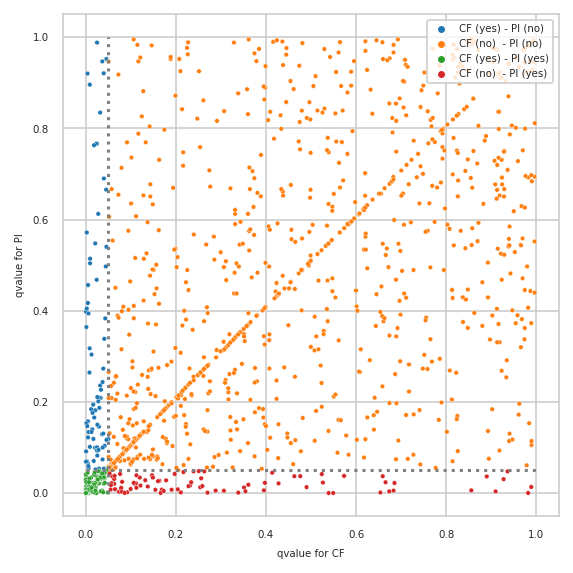

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
vaep.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_CF/diff_analysis_comparision_2_CF


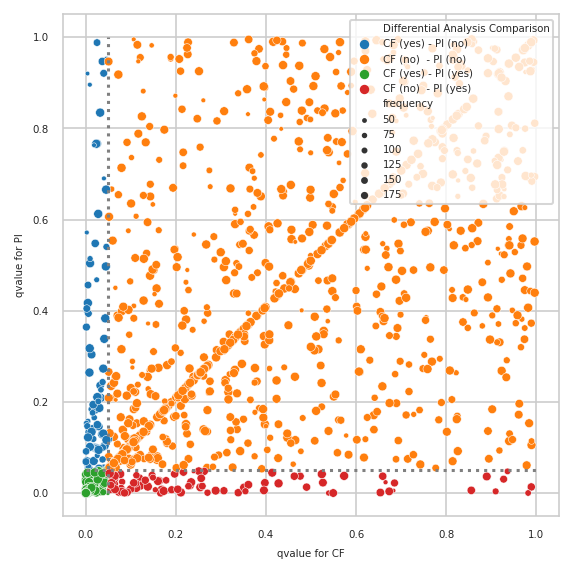

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
vaep.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = vaep.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

vaep.databases.diseases - WARNING  There are more associations available


,ENSP,score
None,,
PSEN2,ENSP00000355747,5.000
PSEN1,ENSP00000326366,5.000
APOE,ENSP00000252486,5.000
APP,ENSP00000284981,5.000
MAPT,ENSP00000340820,4.800
...,...,...
ZBTB22,ENSP00000407545,0.683
HMGN2,ENSP00000355228,0.683
PPP1R13B,ENSP00000202556,0.683


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out